In [7]:
#To be used on cloud platforms

! python -c "import pykeen" || pip install pykeen
! python -c "import scprep" || pip install scprep

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'scprep'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.9 MB/s 


In [1]:
import os
import pandas as pd
import numpy as np
import pykeen
import scprep

import torch


print(os.getcwd())
base_dir = f"{os.getcwd()}"

/Users/ferran/PhD/yaleCollab


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**DEPRECATION WARNING**

This notebook represents the first effort towards creating a KGE of the 
CellChat and STRING DBS. 

It will act as the stepping stone for a second notebook where we will try to 
incorporate our own scRNA-seq datasets. Code in this notebook will be used to 
build functions for future notebooks, and the repository structure will also be 
modified, relegating this current notebook to a non-functional state.

# Explore PyKEEN and default data

In [ ]:
# import pandas as pd

# from pykeen.triples import TriplesFactory
# from pykeen.pipeline import pipeline
# from pykeen.datasets.nations import NATIONS_TRAIN_PATH

# tf = TriplesFactory.from_path(NATIONS_TRAIN_PATH)

# print(NATIONS_TRAIN_PATH)
# print(tf)

# # training, testing = tf.split()

# # result = pipeline(

# #     training=training,

# #     testing=testing,

# #     model='TransE',

# #     epochs=5,  # short epochs for testing - you should go higher

# # )

# # result.save_to_directory('doctests/test_unstratified_transe')

In [ ]:
# pd.read_csv('/usr/local/lib/python3.9/site-packages/pykeen/datasets/nations/train.txt', sep='\t')

Format data for PYKEEN is in the form of a TSV file with the (h,r,t) format.
THis means that the edges are indeed directed.

WEe can now take either one of two approaches:

- Use STRING database ass a proof of concept. All of these interactions will be considered as @signsallnig interactions. KG will end up having 2 types of edges: those from strign and those from cellchat
- Proper approach with the Functional INteraction network from reactome. Here interaction edges can be of different types, and string comprehension will have to be built to decode the direction column into individual triplets with the (h,r,t) format

## RPY2 cheatsheet

Using R from Python

In [ ]:
# import rpy2
# import rpy2.situation
# for row in rpy2.situation.iter_info(): # Print Rpy2 info
#     print(row)

# from rpy2.robjects.packages import importr
# base = importr("base")
# here = importr("here")

# if here.here()[0] != base_dir:
#     raise ValueError

In [ ]:
# from rpy2.robjects.packages import importr
# base = importr("base")
# here = importr("here")

# INTepi21 = base.readRDS(here.here("CRCTME_story/Integration_CRCTME-Aug21/RData",
# "INTepi21_filt_2022.rds"))
# INTepi21

Load R chunks

In [ ]:
# %load_ext rpy2.ipython

In [ ]:
# %%R
# R.version.string

In [ ]:
# %%R -i INTepi21
# library(base)
# library(tidyverse)
# library(Seurat)
# library(here)

# INTepi21

# STRING + CellchatDB KGE

In [ ]:
import rpy2
import rpy2.situation
for row in rpy2.situation.iter_info(): # Print Rpy2 info
    print(row)

from rpy2.robjects.packages import importr
base = importr("base")
here = importr("here")

if here.here()[0] != base_dir:
    raise ValueError

from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

rpy2 version:
3.4.5
Python version:
3.9.13 (main, Aug  7 2022, 01:33:23) 
[Clang 13.1.6 (clang-1316.0.21.2.5)]
Looking for R's HOME:
    Environment variable R_HOME: /usr/local/Cellar/r/4.2.1_2/lib/R
    Calling `R RHOME`: /usr/local/Cellar/r/4.2.1_2/lib/R
    Environment variable R_LIBS_USER: None
R's additions to LD_LIBRARY_PATH:
/usr/local/lib/R/library/stats/libs/
R version:
    In the PATH: R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/usr/local/Cellar/r/4.2.1_2/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'icucore', 'dl', 'm', 'iconv']
  library_dirs:
  ['/usr/local/opt/gettext/lib', '/usr/local/opt/readline/lib', '/usr/local/opt/xz/lib', '/usr/local/lib', '/usr/local/opt/gettext/lib', '/usr/local/opt/readline/lib', '/usr/local/opt/xz/lib', '/usr/local/lib', '/usr/local/Cellar/r/4.2.1_2/lib/R/lib', '/usr/local/Cellar/pcre2/

Download cellchat DB with the following:

`wget https://github.com/sqjin/CellChat/raw/master/data/CellChatDB.mouse.rda`

TO use in the cloud, ahve logic that looks for local file, if not present, try to download with ipynb cloud !bash notation and if it fails (for reasons or because user is local) just prompt to download from URL.

In [ ]:
r["load"]("CellChatDB.mouse.rda")

ccDB_mouse = r["CellChatDB.mouse"]
ccDB_mouse[0]

,interaction_name,pathway_name,ligand,receptor,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2
TGFB1_TGFBR1_TGFBR2,TGFB1_TGFBR1_TGFBR2,TGFb,Tgfb1,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb1 - (Tgfbr1+Tgfbr2)
TGFB2_TGFBR1_TGFBR2,TGFB2_TGFBR1_TGFBR2,TGFb,Tgfb2,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb2 - (Tgfbr1+Tgfbr2)
TGFB3_TGFBR1_TGFBR2,TGFB3_TGFBR1_TGFBR2,TGFb,Tgfb3,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb3 - (Tgfbr1+Tgfbr2)
TGFB1_ACVR1B_TGFBR2,TGFB1_ACVR1B_TGFBR2,TGFb,Tgfb1,ACVR1B_TGFbR2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1b+Tgfbr2)
TGFB1_ACVR1C_TGFBR2,TGFB1_ACVR1C_TGFBR2,TGFb,Tgfb1,ACVR1C_TGFbR2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1c+Tgfbr2)
...,...,...,...,...,...,...,...,...,...,...,...
TIGIT_PVR,TIGIT_PVR,TIGIT,Tigit,Pvr,,,,,PMID:24987108,Cell-Cell Contact,Tigit - Pvr
ITGA4_ITGB1_VCAM1,ITGA4_ITGB1_VCAM1,VCAM,ITGA4_ITGB1,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb1)
ITGA9_ITGB1_VCAM1,ITGA9_ITGB1_VCAM1,VCAM,ITGA9_ITGB1,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga9+Itgb1)
ITGA4_ITGB7_VCAM1,ITGA4_ITGB7_VCAM1,VCAM,ITGA4_ITGB7,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb7)


In [ ]:
ccDB_mouse[3]

,Symbol,Name,EntrezGene.ID,Ensembl.Gene.ID,HomoloGene.ID,HGNC.ID
MGI:87853,a,nonagouti,50518,ENSMUSG00000027596,1264,HGNC:745
MGI:87854,Pzp,"PZP, alpha-2-macroglobulin like",11287,ENSMUSG00000030359,104112,null
MGI:87859,Abl1,"c-abl oncogene 1, non-receptor tyrosine kinase",11350,ENSMUSG00000026842,3783,HGNC:76
MGI:87860,Abl2,v-abl Abelson murine leukemia viral oncogene 2...,11352,ENSMUSG00000026596,5278,HGNC:77
MGI:87862,Scgb1b27,"secretoglobin, family 1B, member 27",11354,ENSMUSG00000066583,114479,null
...,...,...,...,...,...,...
MGI:1913728,Cd99,CD99 antigen,673094,,48107,HGNC:7082
MGI:96876,Klra,"killer cell lectin-like receptor, subfamily A",17055,,,HGNC:6372
MGI:1891386,Ccl21c,chemokine (C-C motif) ligand 21C (leucine),111654,,,HGNC:10620
MGI:107670,Ifna,interferon alpha,4663,,,


In [ ]:
#Print ligands and receptors
dCellChat = ccDB_mouse[0]

ligands = [str(x.split(" - ")[0].strip()) for x in dCellChat["interaction_name_2"]]

receptors = [x.split(" - ")[1][1:-1].strip().split("+") if "+" in x 
                else str(x.split(" - ")[1].strip()) 
            for x in dCellChat["interaction_name_2"]]
#Nested list for coreceptors, otherwise store as string

dCellChat["ligand"] = ligands
dCellChat["receptor"] = receptors

dCellChat

,interaction_name,pathway_name,ligand,receptor,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2
TGFB1_TGFBR1_TGFBR2,TGFB1_TGFBR1_TGFBR2,TGFb,Tgfb1,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb1 - (Tgfbr1+Tgfbr2)
TGFB2_TGFBR1_TGFBR2,TGFB2_TGFBR1_TGFBR2,TGFb,Tgfb2,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb2 - (Tgfbr1+Tgfbr2)
TGFB3_TGFBR1_TGFBR2,TGFB3_TGFBR1_TGFBR2,TGFb,Tgfb3,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb3 - (Tgfbr1+Tgfbr2)
TGFB1_ACVR1B_TGFBR2,TGFB1_ACVR1B_TGFBR2,TGFb,Tgfb1,"[Acvr1b, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1b+Tgfbr2)
TGFB1_ACVR1C_TGFBR2,TGFB1_ACVR1C_TGFBR2,TGFb,Tgfb1,"[Acvr1c, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1c+Tgfbr2)
...,...,...,...,...,...,...,...,...,...,...,...
TIGIT_PVR,TIGIT_PVR,TIGIT,Tigit,Pvr,,,,,PMID:24987108,Cell-Cell Contact,Tigit - Pvr
ITGA4_ITGB1_VCAM1,ITGA4_ITGB1_VCAM1,VCAM,Vcam1,"[Itga4, Itgb1]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb1)
ITGA9_ITGB1_VCAM1,ITGA9_ITGB1_VCAM1,VCAM,Vcam1,"[Itga9, Itgb1]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga9+Itgb1)
ITGA4_ITGB7_VCAM1,ITGA4_ITGB7_VCAM1,VCAM,Vcam1,"[Itga4, Itgb7]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb7)


In [ ]:
#Pivot longer the correceptors
df = []
#Apply more efficient parsing than iterrows?
for i in dCellChat.iterrows():
    if type(i[1]["receptor"]) is list: #ONly iterate over lists (coreceptors)
        for r in i[1]["receptor"]:#i[1] to get data, not index
            df.append([i[1]["ligand"], "LRinteraction", r, 
                        i[1]["pathway_name"]])
    else:
        df.append([i[1]["ligand"], "LRinteraction", i[1]["receptor"], 
                    i[1]["pathway_name"]])

dCellChat = pd.DataFrame(df, 
                columns=["head","relation","tail","pathway"]
                ).drop_duplicates() 
    #Drop duplicates arising from receptor/coreceptor undefinition
dCellChat

,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
2935,Vcam1,LRinteraction,Itga4,VCAM
2936,Vcam1,LRinteraction,Itgb1,VCAM
2937,Vcam1,LRinteraction,Itga9,VCAM
2940,Vcam1,LRinteraction,Itgb7,VCAM


Download STRING database using the following:
 - Murine: `wget https://stringdb-static.org/download/protein.links.v11.5/10090.protein.links.v11.5.txt.gz`
 - Human: `wget https://stringdb-static.org/download/protein.links.v11.5/9606.protein.links.v11.5.txt.gz`

Don't forget to gunzip afterwards. Also, like with the celllchatDB, this could potentially be automated as a bash pipe.

In [ ]:
dSTRING = pd.read_csv("murineSTRING.txt", sep=" ")
dSTRING

,protein1,protein2,combined_score
0,10090.ENSMUSP00000000001,10090.ENSMUSP00000031145,161
1,10090.ENSMUSP00000000001,10090.ENSMUSP00000071486,208
2,10090.ENSMUSP00000000001,10090.ENSMUSP00000119330,183
3,10090.ENSMUSP00000000001,10090.ENSMUSP00000066449,259
4,10090.ENSMUSP00000000001,10090.ENSMUSP00000061539,229
...,...,...,...
14496353,10090.ENSMUSP00000141183,10090.ENSMUSP00000130793,150
14496354,10090.ENSMUSP00000141183,10090.ENSMUSP00000135905,150
14496355,10090.ENSMUSP00000141183,10090.ENSMUSP00000139505,248
14496356,10090.ENSMUSP00000141183,10090.ENSMUSP00000048340,211


In [ ]:
dSTRING.shape[0]

14496358

In [ ]:
#Make dataframe with (h,r,t) format for high confidence interactions (>700 score)
df = dSTRING.loc[dSTRING["combined_score"]>700, ["protein1","protein2"]]

dSTRING = pd.DataFrame({"head": df["protein1"].str.extract(pat=r"\.(.+$)",
                                                expand=False),
                        "relation": np.repeat("FIstring", df.shape[0]),
                        "tail":df["protein2"].str.extract(pat=r"\.(.+$)",
                                                expand=False)
                        })
dSTRING

,head,relation,tail
13,ENSMUSP00000000001,FIstring,ENSMUSP00000062392
49,ENSMUSP00000000001,FIstring,ENSMUSP00000027603
53,ENSMUSP00000000001,FIstring,ENSMUSP00000029482
70,ENSMUSP00000000001,FIstring,ENSMUSP00000080162
86,ENSMUSP00000000001,FIstring,ENSMUSP00000053818
...,...,...,...
14495803,ENSMUSP00000141166,FIstring,ENSMUSP00000075242
14495849,ENSMUSP00000141166,FIstring,ENSMUSP00000029871
14495897,ENSMUSP00000141166,FIstring,ENSMUSP00000025083
14495916,ENSMUSP00000141166,FIstring,ENSMUSP00000036438


Use biomart to go from ENSEMBL PROTEIN IDs to gene symbols.
NO need to get interspecies orthologues as both genes and protein DBs are murine.

In [ ]:
from biomart import BiomartServer

In [ ]:
#Function this?

server = BiomartServer("http://useast.ensembl.org/biomart")
server.verbose = True

mart = server.datasets["mmusculus_gene_ensembl"]

# #Below gets list of embslID for string nodes, but request fails due to too many items in filter
# query_items = list(pd.concat([dSTRING["head"],dSTRING["tail"]]).drop_duplicates())

# response = mart.search({"attributes":["ensembl_peptide_id","mgi_symbol"],
#                         "filters": {"ensembl_peptide_id":query_items}})
# response


#Dumb approach
response = mart.search({"attributes":["ensembl_peptide_id","mgi_symbol"]})

transDF = []

for line in response.raw.data.decode("utf-8").splitlines():
    line = line.split("\t")
    if len(line[0]) > 0: #Only get gene symbols with ENSP ID
        transDF.append(line)

transDF = pd.DataFrame(transDF, 
                columns=["ensembl_peptide_id","mgi_symbol"]
                ).drop_duplicates() 


[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 107'] Fetching datasets
[BiomartDatabase:'Mouse strains 107'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 107'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 107'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 107'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['ensembl_peptide_id', 'mgi_symbol']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="ensembl_peptide_id" /><Attribute nam

In [ ]:
transDF

,ensembl_peptide_id,mgi_symbol
0,ENSMUSP00000080991,mt-Nd1
1,ENSMUSP00000080992,mt-Nd2
2,ENSMUSP00000080993,mt-Co1
3,ENSMUSP00000080994,mt-Co2
4,ENSMUSP00000080995,mt-Atp8
...,...,...
67147,ENSMUSP00000129592,Ptprj
67148,ENSMUSP00000159520,Kynu
67149,ENSMUSP00000028223,Kynu
67150,ENSMUSP00000108445,Kynu


Apply translation dataframe to dSTRING:

In [ ]:
transDict = transDF.set_index("ensembl_peptide_id"
                ).to_dict(
                    #Transform DF into a dictionary but first set index
                )["mgi_symbol"]#Nested dict, so get first (and only item)
# transDict

Update dSTRING. Current gene symbol method instroduces NaN:

- Remove for now.
- Future use ENSBLID for genes and peptides, as we will have 2 types of nodes

In [ ]:
dSTRING["head"] = dSTRING["head"].map(transDict)
dSTRING["tail"] = dSTRING["tail"].map(transDict)

In [ ]:
print(dSTRING.shape)
dSTRING.dropna(inplace=True)
dSTRING

(464754, 3)


,head,relation,tail
13,Gnai3,FIstring,Prkca
49,Gnai3,FIstring,Rgs18
53,Gnai3,FIstring,Gpsm2
70,Gnai3,FIstring,Adrb3
86,Gnai3,FIstring,Gnat2
...,...,...,...
14495803,Gm28635,FIstring,Arhgap35
14495849,Gm28635,FIstring,Cdh17
14495897,Gm28635,FIstring,Kif5b
14495916,Gm28635,FIstring,Tjp3


In [ ]:
print(dCellChat.shape)
dCellChat.dropna(inplace=True)
dCellChat

(2063, 4)


,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
2935,Vcam1,LRinteraction,Itga4,VCAM
2936,Vcam1,LRinteraction,Itgb1,VCAM
2937,Vcam1,LRinteraction,Itga9,VCAM
2940,Vcam1,LRinteraction,Itgb7,VCAM


Save processed database, individually and as one.

In [ ]:
dSTRING.to_csv("dSTRING.tsv", sep="\t", index=False)
dCellChat.to_csv("dCellChat.tsv", sep="\t", index=False)

In [ ]:
dINT = pd.concat([dCellChat, dSTRING]).drop_duplicates()
dINT

,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
14495803,Gm28635,FIstring,Arhgap35,NaN
14495849,Gm28635,FIstring,Cdh17,NaN
14495897,Gm28635,FIstring,Kif5b,NaN
14495916,Gm28635,FIstring,Tjp3,NaN


In [ ]:
dINT.to_csv("dINT.tsv", sep="\t", index=False)
#BEWARE of header being saved. If imported directly into pykeen it will think there's extra nodes/relations

In [ ]:
dINT.drop("pathway", axis=1).drop_duplicates().to_csv("dINT_simpl.tsv", sep="\t", index=False, header=False)

# Constructing the Knowledge Graph Embedding

In [ ]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

Use train/test and validation splits for early stopping

In [ ]:
path2Data = "dINT_simpl.tsv"

tf = TriplesFactory.from_path(path2Data)
tf

TriplesFactory(num_entities=16232, num_relations=2, create_inverse_triples=False, num_triples=439023, path="/Users/ferran/PhD/yaleCollab/dINT_simpl.tsv")

In [ ]:
print(tf.mapped_triples)
print(tf.mapped_triples.numpy().shape)
print(len(tf.entity_id_to_label))
# tf.entity_id_to_label

In [ ]:
for k,v in tf.entity_id_to_label.items():
    if v == "0610009B22Rik":
        print(k)

1


Saving the entity2label object produced by TriplesFactory

In [ ]:
import json

with open("entityIDS.json","w") as outf:
    json.dump(tf.entity_id_to_label, outf)

## Use defaults and 50 dimensional embedding spaces

In [ ]:
%%time

training, testing, validation = tf.split([.8, .1, .1])

result = pipeline(
    training=training,
    testing=testing,
    validation=validation,
    model="TransE",
    model_kwargs=dict(embedding_dim=50),
    training_loop='sLCWA',
    negative_sampler='basic',
    stopper="early",
    random_seed=42,
    epochs=10,  # short epochs for testing - you should go
                # higher, especially with early stopper enabled
                
)

result.save_to_directory("one50_unstratified_stopped_transe")

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [334990, 43902, 43903]
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/ferran/.data/pykeen/checkpoints/best-model-weights-0f49fa89-4868-48b5-9370-7e6bd88ebd65.pt
Training epochs on cpu:  90%|█████████ | 9/10 [02:11<00:13, 13.25s/epoch, loss=0.0195, prev_loss=0.0212]INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 338.67s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.35280049199371344. Saved model weights to /Users/ferran/.data/pykeen/checkpoints/best-model-weights-0f49fa89-4868-48b5-9370-7e6bd88ebd65.pt
INFO:pykeen.training.training

CPU times: user 12min 35s, sys: 1min 11s, total: 13min 47s
Wall time: 13min 46s


TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(16232, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2, 50)
    )
  )
  (weight_regularizers): ModuleList()
)


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

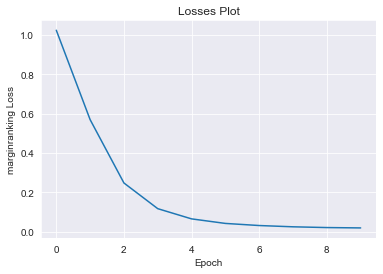

In [ ]:
#model used TransE has only one representation for entities and relations, 
# so modules objects will be of length 1
print(result.model)
result.plot_losses()
# result.plot_early_stopping()

In [ ]:
from typing import List
import pykeen.nn

entity_representation_modules: List['pykeen.nn.Representation'] = result.model.entity_representations
relation_representation_modules: List['pykeen.nn.Representation'] = result.model.relation_representations

In [ ]:
entity_embeddings: pykeen.nn.Embedding = entity_representation_modules[0]
relation_embeddings: pykeen.nn.Embedding = relation_representation_modules[0]

In [ ]:
print(entity_embeddings)
print(relation_embeddings)

Embedding(
  (_embeddings): Embedding(16232, 50)
)
Embedding(
  (_embeddings): Embedding(2, 50)
)


In [ ]:
#Access embeddings by index (default arg returns all)
entity_embedding_tensor: torch.FloatTensor = entity_embeddings(indices=None)
relation_embedding_tensor: torch.FloatTensor = relation_embeddings(indices=None)

In [ ]:
entcount = 0
for i in entity_embedding_tensor:
    entcount+=1
print(f"We have {entcount} entities embedded on {len(i)} dimensions")

relcount = 0
for i in relation_embedding_tensor:
    relcount+=1
print(f"We have {relcount} relations embedded on {len(i)} dimensions")

We have 16232 entities embedded on 50 dimensions
We have 2 relations embedded on 50 dimensions


I don't understand why we have 3 types of relations, when the input data should only have 2!:

* FIXED!: THis was happening because I forgot to rmv the header....

In [ ]:
dINT["relation"].unique()

array(['LRinteraction', 'FIstring'], dtype=object)

Model should have been saved within one50... dir.
For future uses during development,  reload this default model. Later on, once we have added our own data or if prelim results are unsatisfactory, optimize methods and hyperparam.

# DR, clustering and visualisation

Now that we have a 50D KGE representing our data we can apply DR to generate a 2D space on which to visualise the entitites/nodes.

> From [pykeen docs](https://pykeen.readthedocs.io/en/stable/tutorial/translational_toy_example.html)

>*There was a lot of interesting follow-up discussion at !99 during which this code was implemented for re-use. One of the interesting points is that the relation plot is only applicable for translational distance models like TransE. Further, when models whose embeddings are higher than 2, a dimensionality reduction method must be used. For this, one of many of the tools from scikit-learn can be chosen. However, to make sure that the entities and relations are projected on the same axis, the dimensionality reduction model is first trained on the entity embeddings, then applied on both the entity embeddings and relation embeddings. Further, non-linear models like KPCA should not be used when plotting relations, since these _should_ correspond to linear transformations in embedding space.*

Furthermore, we should be able to cluster them and colour by cluster too. Hopefully there should be some overlap btwn the unsupervised clusters and pathway (biological/functional) annotations

## Prep

In [28]:
trained_model = torch.load("one50_unstratified_stopped_transe/trained_model.pkl")
trained_model

TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(16232, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2, 50)
    )
  )
  (weight_regularizers): ModuleList()
)

In [29]:
#Construct nodes dataframe: detach() for now is meaningless as compute is CPU

entity_embeddings = trained_model.entity_representations[0](indices=None).detach().numpy()
entity_embeddings

array([[ 0.019457  ,  0.08779304,  0.07596195, ..., -0.03821058,
        -0.21000484, -0.19302951],
       [ 0.05486259,  0.13551868, -0.08792026, ..., -0.17098741,
        -0.09818703,  0.19641729],
       [ 0.12717593,  0.003318  ,  0.07573958, ...,  0.00599198,
        -0.12838149,  0.02735348],
       ...,
       [ 0.01967096, -0.25154817,  0.09352905, ...,  0.09732759,
        -0.00295671, -0.05159178],
       [ 0.24381754, -0.09071688,  0.12558883, ...,  0.13016768,
        -0.00063644,  0.09144283],
       [ 0.09037016, -0.23543361,  0.09393445, ...,  0.15796362,
        -0.00540877,  0.00322125]], dtype=float32)

To access a map of entities and relations to ID we must use the dictionary derived from the TriplesFactory step.

In [30]:
import json

with open("entityIDS.json") as infile:
    entityIDS = json.load(infile)

# entityIDS

In [31]:
dKGE_50 = pd.DataFrame(entity_embeddings, index=entityIDS.values())
dKGE_50

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
,0.019457,0.087793,0.075962,-0.207849,0.119941,0.083714,0.031919,-0.177164,0.168293,-0.235517,...,-0.081181,-0.087506,0.289390,-0.202629,-0.232671,0.002109,0.018698,-0.038211,-0.210005,-0.193030
0610009B22Rik,0.054863,0.135519,-0.087920,-0.029824,-0.184402,-0.016395,0.093975,-0.003884,0.185336,-0.290509,...,-0.110672,0.077213,0.188933,0.129407,0.297762,-0.104044,-0.009220,-0.170987,-0.098187,0.196417
0610010K14Rik,0.127176,0.003318,0.075740,0.081813,-0.014230,0.272282,-0.137860,0.044193,-0.211423,0.097349,...,-0.007962,0.298000,0.086700,-0.207087,-0.048039,-0.167859,0.307144,0.005992,-0.128381,0.027353
0610040J01Rik,-0.108861,0.042057,-0.084533,-0.105771,0.080763,-0.068589,-0.110380,-0.157835,0.058100,0.165897,...,0.227152,0.005384,0.020007,-0.085966,-0.089837,0.167648,-0.210918,0.091719,0.059068,-0.141545
1110004F10Rik,0.008144,0.068054,-0.005740,-0.142302,0.022075,-0.113955,-0.111913,-0.077338,0.105471,0.219723,...,-0.168579,-0.133227,-0.165981,-0.155507,0.019961,-0.087179,-0.212431,0.026116,0.036709,-0.158244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd3,0.070465,-0.029055,0.143706,0.313893,-0.115391,-0.203659,0.072741,-0.030219,0.142279,0.053968,...,-0.182829,-0.284645,-0.006026,-0.249784,-0.163879,0.226286,0.020546,0.177117,-0.008182,-0.019040
mt-Nd4,0.109107,-0.260516,0.134097,0.312004,0.020866,-0.206730,0.070304,0.042068,0.241827,-0.026155,...,-0.143915,-0.282426,-0.030162,-0.209875,-0.046357,0.205827,0.001434,0.151815,-0.013504,0.003306
mt-Nd4l,0.019671,-0.251548,0.093529,0.253221,-0.173212,-0.184696,0.122070,-0.017267,0.175466,-0.095987,...,-0.158391,-0.291835,0.030602,0.029707,0.049391,-0.006589,0.098745,0.097328,-0.002957,-0.051592
mt-Nd5,0.243818,-0.090717,0.125589,0.311155,0.257015,-0.204160,0.113248,-0.114310,0.082488,0.066766,...,-0.026658,-0.250067,-0.022394,0.142195,0.038209,0.235296,0.100383,0.130168,-0.000636,0.091443


## Compute PCA

Compute PCA and check %var explained by first 2 components.
Use them as prelim space on which to view scatter plot of gene/protein embeddings and then colour downstream by metadata (pathway info and clusters)

In [8]:
import scprep
from sklearn.decomposition import PCA

dKGE_RedDim = PCA(n_components=2).fit_transform(dKGE_50)
dKGE_RedDim = pd.DataFrame(dKGE_RedDim, index=entityIDS.values())
dKGE_RedDim.index.name = "GeneSymbol"
dKGE_RedDim

,0,1
GeneSymbol,,
,0.065037,0.180780
0610009B22Rik,-0.119006,-0.049039
0610010K14Rik,0.116994,0.312636
0610040J01Rik,-0.001348,0.057549
1110004F10Rik,0.030050,-0.030608
...,...,...
mt-Nd3,0.008523,-0.062423
mt-Nd4,-0.000910,-0.065280
mt-Nd4l,0.079618,-0.044567


## Clustering

In [ ]:
print("Number of pathways in CellChatDB: ", len(pd.read_csv("dINT.tsv", sep="\t")["pathway"].unique()))


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of pathways in CellChatDB:  230


array([ 2, 10,  8, ...,  0,  0,  0], dtype=int32)

Let's compute clusters labels for a set of K and see which one results in the best silhouette scores.

For n_clusters = 2 The average silhouette_score is : 0.026669273
For n_clusters = 3 The average silhouette_score is : 0.026278727
For n_clusters = 4 The average silhouette_score is : 0.024541914
For n_clusters = 5 The average silhouette_score is : 0.024945727
For n_clusters = 6 The average silhouette_score is : 0.025815144
For n_clusters = 8 The average silhouette_score is : 0.024099415


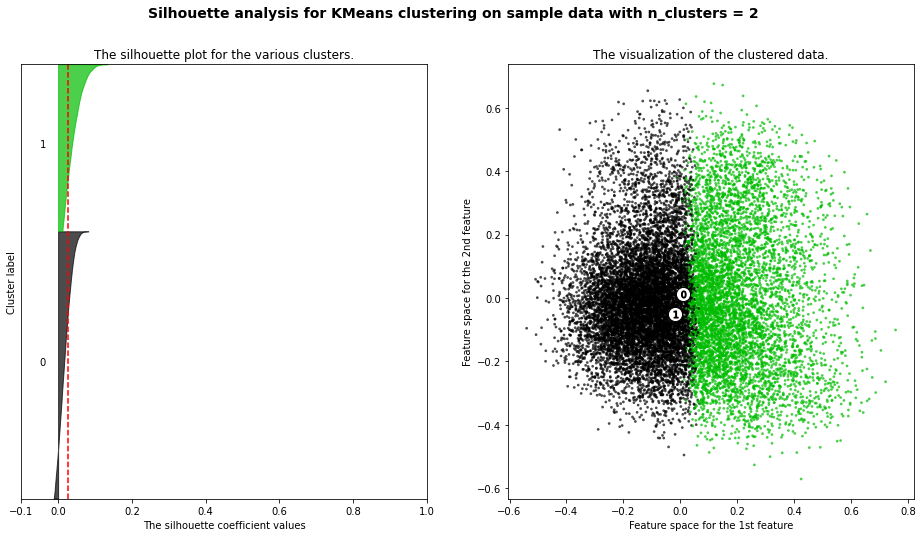

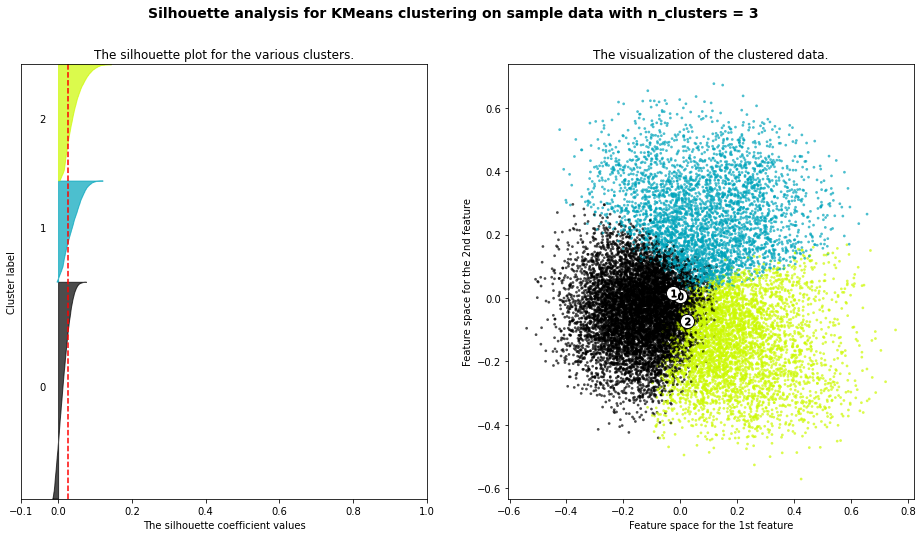

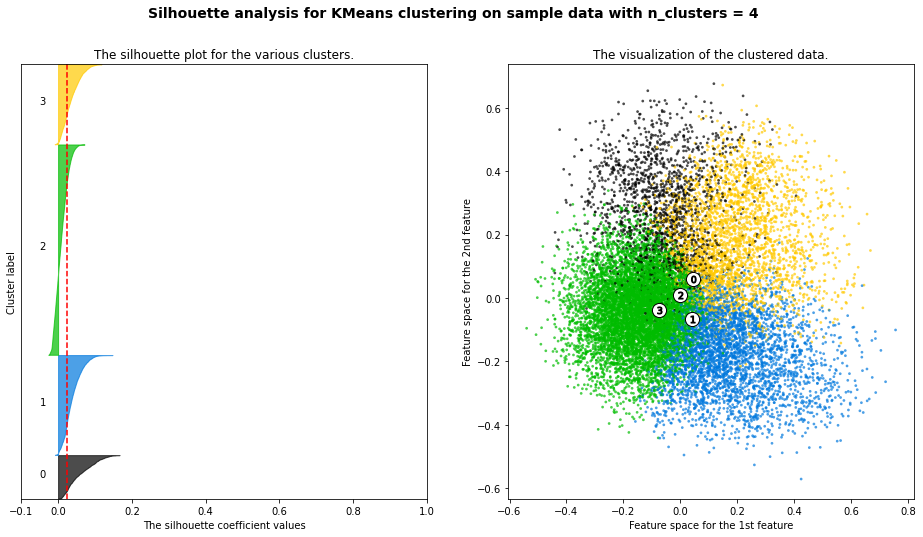

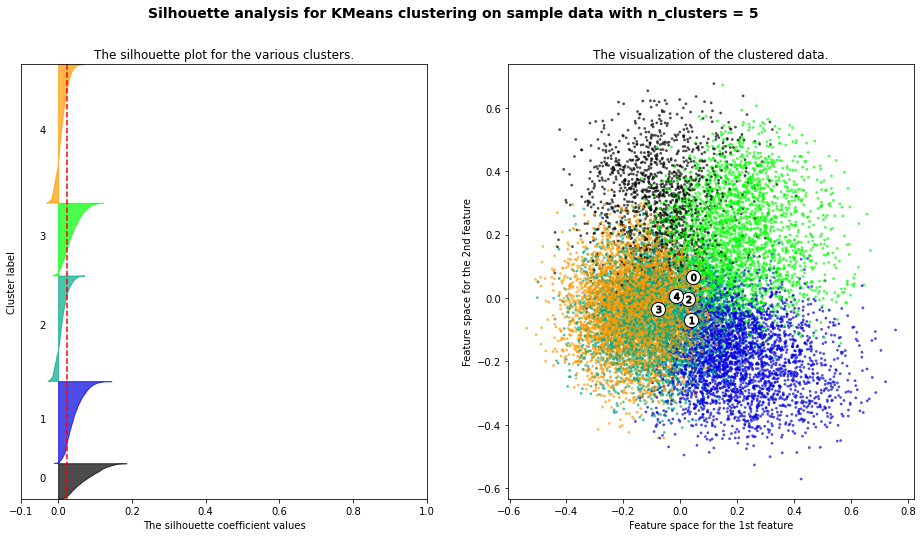

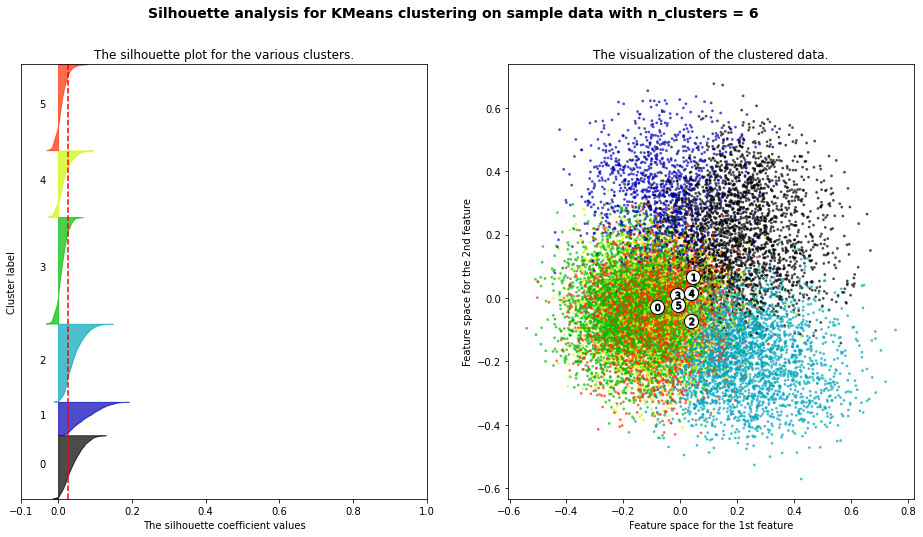

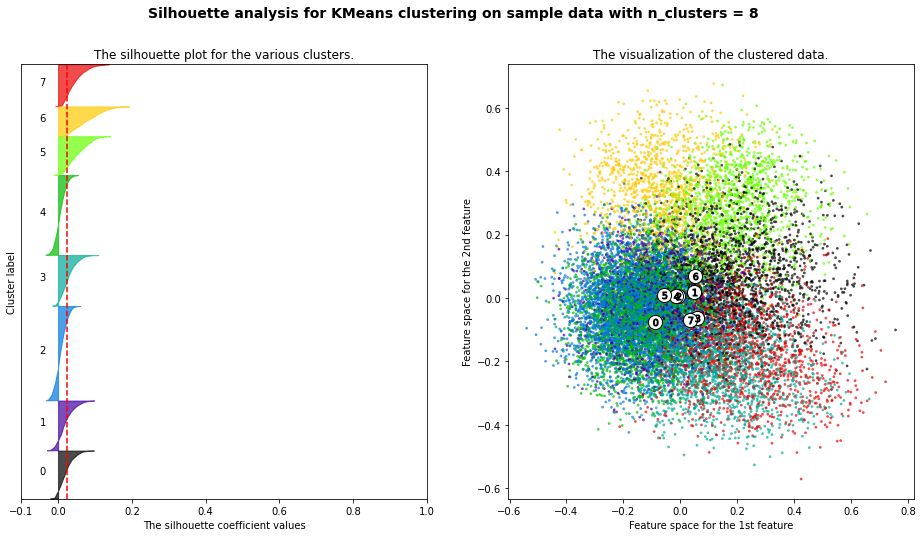

In [15]:
#Snippet from scikit-learn docs

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#Remove NA from first missing genesymbol row in dKGE:
dKGE_50 = dKGE_50.dropna()
dKGE_RedDim = dKGE_RedDim.dropna()

range_clust = [2,3,4,5,6,8]

for n_clusters in range_clust:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    # # but in this example all
    # # lie within [-0.1, 1]
    # ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dKGE_50) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 12 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=12)
    cluster_labels = clusterer.fit_predict(dKGE_50)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dKGE_50, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dKGE_50, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dKGE_RedDim["0"], dKGE_RedDim["1"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Let's use k=4 for now. AVG silhouette scores are kind of abysmal and similar for 
all K (including the previous k=12)

In [16]:
clusters = KMeans(n_clusters=4, random_state=12).fit_predict(dKGE_50)
#Append cluster column to RD dataframe.
dKGE_RedDim.insert(len(dKGE_RedDim.columns), "clust", clusters)
dKGE_RedDim

,0,1,clust
GeneSymbol,,,
NaN,0.065037,0.180780,3
0610009B22Rik,-0.119006,-0.049039,2
0610010K14Rik,0.116994,0.312636,3
0610040J01Rik,-0.001348,0.057549,2
1110004F10Rik,0.030050,-0.030608,2
...,...,...,...
mt-Nd3,0.008523,-0.062423,1
mt-Nd4,-0.000910,-0.065280,2
mt-Nd4l,0.079618,-0.044567,2


## Pathway metadata annotation

Get pathway info via REACTOME database (WIP)

- ReactomePathways DB has 2 columns, one for the pathway ID and another for the string name:
    - `curl -o ReactomePathways.txt https://reactome.org/download/current/ReactomePathways.txt`
<!-- - Ewas2Pathway DB links reactome protein/PTM ID with 2 pathway ID, lowest and higher level. -->
- ENSEMBL2Reactmoe DB can be used to link ENSEMBL with reactome pathways
    - `curl -o Ensembl2Reactome.txt https://reactome.org/download/current/Ensembl2Reactome.txt`
    - `curl -o Ensembl2Reactome_ALL.txt https://reactome.org/download/current/Ensembl2Reactome_All_Levels.txt`

Notes:
Future application could use Reactome IDS, for gene Symbols can be trivially converted and ENSP ID can also be converted from STRINGs or REACTOME's own Functional Interaction network DBS -> Need to pick the baseline EWAS ID for a non PTMd/modified entity. 

Also nOte that ideally Antibodies from a cytof panel woud need to be fuzzy matched against Reactome EWAS names to get a REactome ID specific to a certain PTM. OTherwise, use ENSP ID to ReactomeEWAS

In [26]:
from biomart import BiomartServer


#Load reactome database
dENSMUSpathwayR = pd.read_csv("Ensembl2Reactome.txt", sep="\t", header=None)
dENSMUSpathwayR = dENSMUSpathwayR.loc[dENSMUSpathwayR[5]=="Mus musculus"]
#Number of pathways
print(len(dENSMUSpathwayR[1].unique()))
print(len(dENSMUSpathwayR[3].unique()))

#Biomart
server = BiomartServer("http://useast.ensembl.org/biomart")
server.verbose = True

mart = server.datasets["mmusculus_gene_ensembl"]

response = mart.search({"attributes":["ensembl_peptide_id","mgi_symbol"]})

transDF = []

for line in response.raw.data.decode("utf-8").splitlines():
    line = line.split("\t")
    if len(line[0]) > 0: #Only get gene symbols with ENSP ID
        transDF.append(line)

transDF = pd.DataFrame(transDF, 
                columns=["ensembl_peptide_id","mgi_symbol"]
                ).drop_duplicates()

transDict = transDF.set_index("ensembl_peptide_id"
                ).to_dict(
                    #Transform DF into a dictionary but first set index
                )["mgi_symbol"]#Nested dict, so get first (and only item)
transDict

dENSMUSpathwayR[0] = dENSMUSpathwayR[0].map(transDict)
dENSMUSpathwayR.dropna(inplace=True)

#We have lost "only" 3 pathways from ENSP to geneSymbol missmatches
print(len(dENSMUSpathwayR[1].unique()))

#Turn into dictionary for mapping:
dENSMUSpathwayR = pd.DataFrame(dENSMUSpathwayR, 
                columns=[0,3]
                ).drop_duplicates()
print(dENSMUSpathwayR)



1360
1360
[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 107'] Fetching datasets
[BiomartDatabase:'Mouse strains 107'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 107'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 107'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 107'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['ensembl_peptide_id', 'mgi_symbol']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="ensembl_peptide_id" /><Att

Dictionary that links a GeneSymbol with (lowest level) pathways from Reactome

In [50]:
dPathwayDict = {}

for i in dENSMUSpathwayR.iterrows():
    gene = i[1][0]
    pathway = i[1][3]
    if gene not in dPathwayDict.keys():
        dPathwayDict[gene] = []
    dPathwayDict[gene].append(pathway)

print(dPathwayDict["Gnai3"])
print(dPathwayDict[gene])

['Adenylate cyclase inhibitory pathway', 'ADP signalling through P2Y purinoceptor 12', 'G alpha (i) signalling events', 'Extra-nuclear estrogen signaling']
['PRC2 methylates histones and DNA', 'Condensation of Prophase Chromosomes', 'HATs acetylate histones', 'Recruitment and ATM-mediated phosphorylation of repair and signaling proteins at DNA double strand breaks', 'Nonhomologous End-Joining (NHEJ)', 'Processing of DNA double-strand break ends', 'Deposition of new CENPA-containing nucleosomes at the centromere', 'G2/M DNA damage checkpoint', 'RUNX1 regulates genes involved in megakaryocyte differentiation and platelet function', 'Estrogen-dependent gene expression']


In [52]:
dKGE_RedDim["pathway"] = dKGE_RedDim.index.map(dPathwayDict)
dKGE_RedDim

,0,1,clust,pathway
GeneSymbol,,,,
NaN,0.065037,0.180780,3,NaN
0610009B22Rik,-0.119006,-0.049039,2,NaN
0610010K14Rik,0.116994,0.312636,3,NaN
0610040J01Rik,-0.001348,0.057549,2,NaN
1110004F10Rik,0.030050,-0.030608,2,NaN
...,...,...,...,...
mt-Nd3,0.008523,-0.062423,1,"[Respiratory electron transport, Complex I bio..."
mt-Nd4,-0.000910,-0.065280,2,"[Respiratory electron transport, Complex I bio..."
mt-Nd4l,0.079618,-0.044567,2,NaN


**FUTURE?** 
Use instead higher level pathawys, for lower level results in over 1k pathways (and we just need a proof of concept that it is working)

In [ ]:
# dENSMUSpathwayR = pd.read_csv("Ensembl2Reactome_ALL.txt", sep="\t", header=None)
# dENSMUSpathwayR = dENSMUSpathwayR.loc[dENSMUSpathwayR[5]=="Mus musculus"]
# dENSMUSpathwayR

## Viz

### Clusters

/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'Clusters'}, xlabel='PC-1', ylabel='PC-2'>

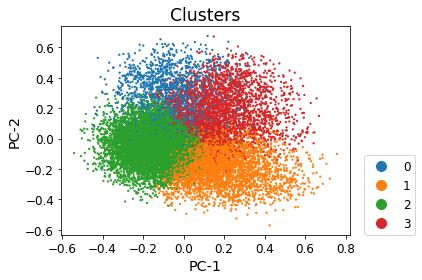

In [53]:
scprep.plot.scatter2d(dKGE_RedDim, c=dKGE_RedDim["clust"], 
    title="Clusters", label_prefix="PC-", 
    legend_loc=(1.05, 0), shuffle=True,
    dpi=480)

DONE: ~~View silhouette scores of current k=12 clusters (in the future. actully use scores to decide on k as shown in
[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=silhouette))~~

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

#We are suing the 50D embedding space. Given our awful k selection, we end up 
# with a very low silhouette avergae. If computing distances on PCA space, 
# the silhouette score even becomes negative lol

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(dKGE_50, dKGE_RedDim[["clust"]])
print(
    "For n_clusters =",
    len(dKGE_RedDim["clust"].unique()),
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(dKGE_50, dKGE_RedDim[["clust"]])
print(sample_silhouette_values)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For n_clusters = 4 The average silhouette_score is : 0.024541914


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.00242772 -0.00108087  0.02806729 ... -0.01392342 -0.01215701
  0.02169761]


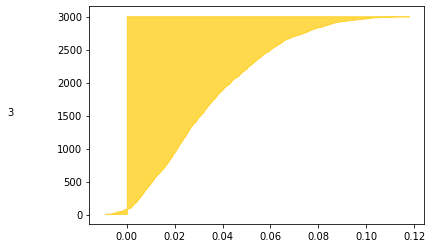

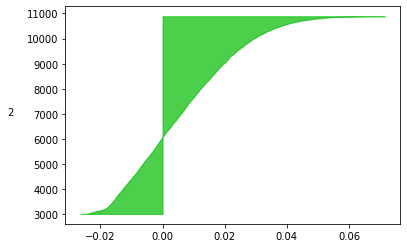

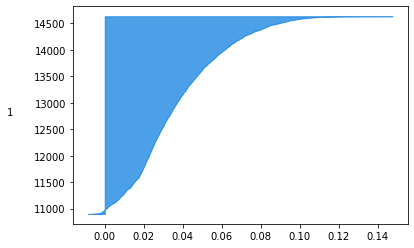

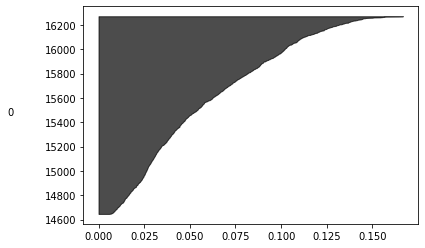

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

y_lower = 10
for i in dKGE_RedDim["clust"].unique():
    fig, ax = plt.subplots()
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[dKGE_RedDim["clust"] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(dKGE_RedDim["clust"].unique()))
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples



NOTE: It is abundantly clear that k=12 is far too high of a number ...

### Pathways

Single pathway "at random"

In [91]:
dKGE_RedDim = dKGE_RedDim.dropna()

pathwayOFinterest = "Respiratory electron transport"

dKGE_RedDim.loc[dKGE_RedDim["pathway"].apply(lambda x: pathwayOFinterest in x)]

hits = dKGE_RedDim.index.isin(dKGE_RedDim.loc[dKGE_RedDim["pathway"].apply(lambda x: pathwayOFinterest in x)].index)
hits

array([False, False, False, ...,  True,  True,  True])

/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PC-1', ylabel='PC-2'>

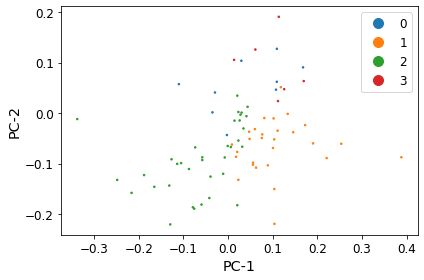

In [92]:
scprep.plot.scatter2d(dKGE_RedDim,
    c=dKGE_RedDim["clust"],
    mask=hits, 
    label_prefix="PC-", shuffle=True)

Biggest pathways

In [23]:
# #Old method where only one pathway is linked with a gene
# dKGE_RedDim.groupby(["pathway"]).size().reset_index(name="counts").sort_values(by=["counts"], ascending=False)

#Current approach with pathway lists
# dKGE_RedDim["pathway"].explode()

import ast

#ast.literal_eval needed to make pathway column into actual lists, so tha we can use series.explode()
dKGE_pathways = dKGE_RedDim.dropna()["pathway"].apply(ast.literal_eval).explode().to_frame()

dKGE_pathways = dKGE_pathways.groupby(["pathway"]).size().reset_index(name="counts").sort_values(
    by=["counts"], ascending=False)
dKGE_pathways

,pathway,counts
727,Neutrophil degranulation,467
95,Antigen processing: Ubiquitination & Proteasom...,271
705,Neddylation,212
419,G alpha (i) signalling events,209
1089,Separation of Sister Chromatids,176
...,...,...
1319,Vitamin E,1
1093,Serotonin clearance from the synaptic cleft,1
743,Nucleotide catabolism,1
322,EGR2 and SOX10-mediated initiation of Schwann ...,1


/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ferran/Library/Python/3.9/lib/python/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ferran/Library/Python/3.9/lib/python/site

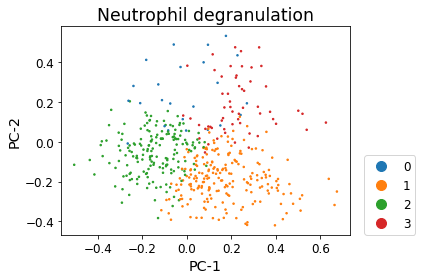

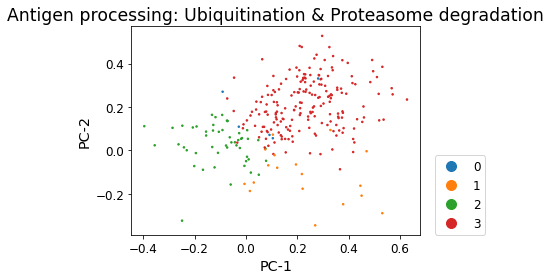

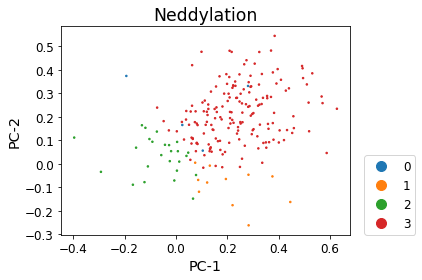

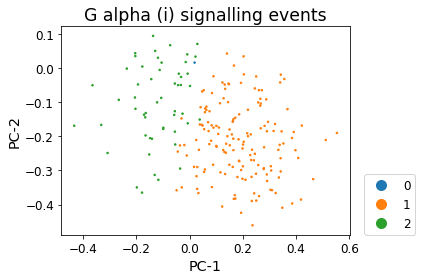

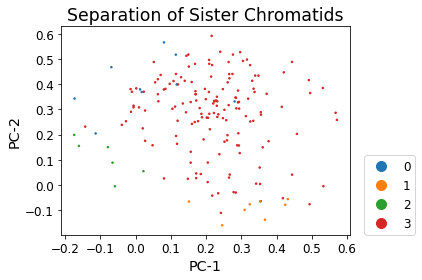

In [27]:
dKGE_RedDim = dKGE_RedDim.dropna()

for i in dKGE_pathways.nlargest(5, "counts")["pathway"]:
    hits = dKGE_RedDim.index.isin(dKGE_RedDim.loc[dKGE_RedDim["pathway"].apply(lambda x: i in x)].index)
    scprep.plot.scatter2d(dKGE_RedDim,
        c=dKGE_RedDim["clust"],
        mask=hits, 
        title = i, label_prefix="PC-", 
        legend_loc=(1.05, 0), shuffle=True,
        dpi=480, figsize=(6,4))

#### Deprecated approach

Silhoutte scores of pathways:
Dirty approach just ot compute AVG silhouette score for all of them.
Also take the top 5 above and compute their silhouette sample scores.

THis used to work when we had only one pathway associated with a single gene. Now however a single gene can belong to multiple pahtways, making silhouette computation impossible impossibly with the current annotation system.
Pathways then will have to essentially be OHE so that we can look a single pathaway agains the rest of genes not linked to it.
An alternative to this that perhaps we should keep in mind would be to use treat pathways as their own type of nodes, and record gene/protein belonging via belongs_to edges.

[DEPRECATED] ALL PATHWAYS

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from sklearn.metrics import silhouette_samples, silhouette_score

# #We are suing the 50D embedding space. Given our awful k selection, we end up 
# # with a very low silhouette avergae. If computing distances on PCA space, 
# # the silhouette score even becomes negative lol

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters

# df2 = RDdataframe.dropna()
# df1 = testdf.loc[testdf.index.isin(df2.index)]

# silhouette_avg = silhouette_score(df1, df2[["pathway"]])
# print(
#     "For n_clusters =",
#     len(df2["pathway"].unique()),
#     "The average silhouette_score is :",
#     silhouette_avg,
# )

# # Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(df1, df2[["pathway"]])
# print(sample_silhouette_values)

# y_lower = 10
# counter = 0
# for i in top5pathways:
#     fig, ax = plt.subplots()
#     # Aggregate the silhouette scores for samples belonging to
#     # cluster i, and sort them
#     ith_cluster_silhouette_values = sample_silhouette_values[df2["pathway"] == i]

#     ith_cluster_silhouette_values.sort()

#     size_cluster_i = ith_cluster_silhouette_values.shape[0]
#     y_upper = y_lower + size_cluster_i

#     color = cm.nipy_spectral(float(counter) / len(top5pathways))
#     ax.fill_betweenx(
#         np.arange(y_lower, y_upper),
#         0,
#         ith_cluster_silhouette_values,
#         facecolor=color,
#         edgecolor=color,
#         alpha=0.7,
#     )

#     # Label the silhouette plots with their cluster numbers at the middle
#     ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#     # Compute the new y_lower for next plot
#     y_lower = y_upper + 10  # 10 for the 0 samples
#     counter+=1

[DEPRECATED] Subset to entities belonging to the top 5 pathways only

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from sklearn.metrics import silhouette_samples, silhouette_score

# #We are suing the 50D embedding space. Given our awful k selection, we end up 
# # with a very low silhouette avergae. If computing distances on PCA space, 
# # the silhouette score even becomes negative lol

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters

# df2 = RDdataframe.loc[RDdataframe["pathway"].isin(top5pathways)].dropna()
# df1 = testdf.loc[testdf.index.isin(df2.index)]

# silhouette_avg = silhouette_score(df1, df2[["pathway"]])
# print(
#     "For n_clusters =",
#     len(df2["pathway"].unique()),
#     "The average silhouette_score is :",
#     silhouette_avg,
# )

# # Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(df1, df2[["pathway"]])
# print(sample_silhouette_values)

# y_lower = 10
# counter = 0
# for i in top5pathways:
#     fig, ax = plt.subplots()
#     # Aggregate the silhouette scores for samples belonging to
#     # cluster i, and sort them
#     ith_cluster_silhouette_values = sample_silhouette_values[df2["pathway"] == i]

#     ith_cluster_silhouette_values.sort()

#     size_cluster_i = ith_cluster_silhouette_values.shape[0]
#     y_upper = y_lower + size_cluster_i

#     color = cm.nipy_spectral(float(counter) / len(top5pathways))
#     ax.fill_betweenx(
#         np.arange(y_lower, y_upper),
#         0,
#         ith_cluster_silhouette_values,
#         facecolor=color,
#         edgecolor=color,
#         alpha=0.7,
#     )

#     # Label the silhouette plots with their cluster numbers at the middle
#     ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#     # Compute the new y_lower for next plot
#     y_lower = y_upper + 10  # 10 for the 0 samples
#     counter+=1

[DEPRECATED] Now, this looks promisisng. Among the top pathways, we can see how the silhouette scores kind of match the patterns seen on the PCA embedding, where some pathways are clearly localised in a region of the space (and linked with a subset of clusters), while others seem to be dispersed throughout.
Biological signaficance of this should be somewhat easy to hypothesise on...

Single pathway approach:
This is feasible with the multiple genes/pathway data, as we can just build a label for silhouette computation that determines if a gene belongs or not to a particular pathway.

Do it for the top 5 pathways as found in the previous section.

In [59]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# df2 = RDdataframe.dropna()
# df1 = testdf.loc[testdf.index.isin(df2.index)]

# silhouette_avg = silhouette_score(df1, df2[["pathway"]])
# print(
#     "For n_clusters =",
#     len(df2["pathway"].unique()),
#     "The average silhouette_score is :",
#     silhouette_avg,
# )
dKGE_RedDim = dKGE_RedDim.dropna()
df1 = dKGE_50.loc[dKGE_50.index.isin(dKGE_RedDim.index)]

for i in dKGE_pathways.nlargest(5, "counts")["pathway"]:
    print(i)
    df2 = dKGE_RedDim.index.isin(dKGE_RedDim.loc[dKGE_RedDim["pathway"].apply(lambda x: i in x)].index)
    silhouette_avg = silhouette_score(df1, df2)
    print(f"For {i} pathway",
    f"The average silhouette_score is {silhouette_avg}")


Neutrophil degranulation
For Neutrophil degranulation pathway The average silhouette_score is 8.710689144209027e-05
Antigen processing: Ubiquitination & Proteasome degradation
For Antigen processing: Ubiquitination & Proteasome degradation pathway The average silhouette_score is 0.0011340456549078226
Neddylation
For Neddylation pathway The average silhouette_score is 0.0003916259447578341
G alpha (i) signalling events
For G alpha (i) signalling events pathway The average silhouette_score is -0.00045613673864863813
Separation of Sister Chromatids
For Separation of Sister Chromatids pathway The average silhouette_score is 0.0016799657605588436


## Save/Load metada

In [88]:
dKGE_RedDim.to_csv("dKGE_RedDim.csv")

In [2]:
dKGE_RedDim = pd.read_csv("dKGE_RedDim.csv", index_col="GeneSymbol")
dKGE_RedDim

,0,1,clust,pathway
GeneSymbol,,,,
NaN,0.065037,0.180780,3,NaN
0610009B22Rik,-0.119006,-0.049039,2,NaN
0610010K14Rik,0.116994,0.312636,3,NaN
0610040J01Rik,-0.001348,0.057549,2,NaN
1110004F10Rik,0.030050,-0.030608,2,NaN
...,...,...,...,...
mt-Nd3,0.008523,-0.062423,1,"['Respiratory electron transport', 'Complex I ..."
mt-Nd4,-0.000910,-0.065280,2,"['Respiratory electron transport', 'Complex I ..."
mt-Nd4l,0.079618,-0.044567,2,NaN
